In [1]:
#The goal is to go beyond regex of useful substrings from each entry, and to perform topological analysis of address construction
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file = 'NonStdAdd.tsv'
df=pd.read_table(file)
df.insert(0,'id',range(1,len(df)+1))
df.fillna("", inplace=True)
df.iloc[[442]]

,id,Address,Count
442,443,,20


In [3]:
#bar = [word.replace(',','') for address in df['Address'] for word in address.split(' ')] #breaks list of str into list of lists - unwanted behavior
#df['bag1'] = [ad.split() for ad in df['Address']]
df['bag'] = df['Address'].apply(lambda address: [word.strip(',') for word in address.split()])
#bag = df['Address'].apply(lambda x: x.split()) #does the same thing as the list comprehension
#print(bag[0])
#result = [word.strip(",") for word in bag]
df.iloc[[638]]

,id,Address,Count,bag
638,639,"MK13-05599X PT, MK13-05610K PT, MK13-06071C PT...",285,"[MK13-05599X, PT, MK13-05610K, PT, MK13-06071C..."


In [4]:
df['len_topo'] = df['bag'].apply(lambda bag: '-'.join([str(len(part)) for part in bag]))
df.iloc[[638]]

,id,Address,Count,bag,len_topo
638,639,"MK13-05599X PT, MK13-05610K PT, MK13-06071C PT...",285,"[MK13-05599X, PT, MK13-05610K, PT, MK13-06071C...",11-2-11-2-11-2-3-8-3-11-5-2-9-13-1-8-1-3-4-7-5...


                           id  Address  Count  bag
len_topo                                          
1-5-4-9-6                   2        2      2    2
1-6-4-9-6                   3        3      3    3
11-11-11-11-11-11-2-5-7-8   2        2      2    2
11-2-10-8                   2        2      2    2
11-2-3-4-4                  2        2      2    2
11-2-4-5-6-1                2        2      2    2
11-2-4-5-6-2                2        2      2    2
11-2-5-5                    4        4      4    4
11-2-6-4                    2        2      2    2
11-2-6-6-2                  3        3      3    3
11-2-7-4                    2        2      2    2
11-2-9-4                    2        2      2    2
11-2-9-4-1-7-4              2        2      2    2
2-4-3-5-9-6                 2        2      2    2
2-5-4-9-6                   2        2      2    2
2-5-6-9-6                   3        3      3    3
2-6-4-9-6                   9        9      9    9
2-7-4-9-6                   3  

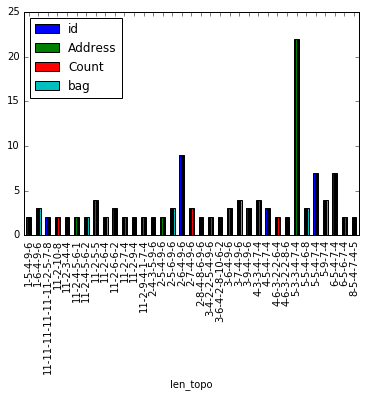

In [5]:
len_topodf = df.groupby('len_topo').count()
print(len_topodf[len_topodf.Count != 1])
len_topodf[len_topodf.Count != 1].plot(kind='bar')
plt.show()

In [6]:
df['wc_topo'] = [len(bag) for bag in df['bag']]
df.iloc[[638]]

,id,Address,Count,bag,len_topo,wc_topo
638,639,"MK13-05599X PT, MK13-05610K PT, MK13-06071C PT...",285,"[MK13-05599X, PT, MK13-05610K, PT, MK13-06071C...",11-2-11-2-11-2-3-8-3-11-5-2-9-13-1-8-1-3-4-7-5...,28


          id  Address  Count  bag  len_topo
wc_topo                                    
3          6        6      6    6         6
4         33       33     33   33        33
5        105      105    105  105       105
6         93       93     93   93        93
7         72       72     72   72        72
8         71       71     71   71        71
9         60       60     60   60        60
10        41       41     41   41        41
11        29       29     29   29        29
12        21       21     21   21        21
13        21       21     21   21        21
14        16       16     16   16        16
15        10       10     10   10        10
16        13       13     13   13        13
17        12       12     12   12        12
18        16       16     16   16        16
19         8        8      8    8         8
20         9        9      9    9         9
21        10       10     10   10        10
22         9        9      9    9         9
23         4        4      4    

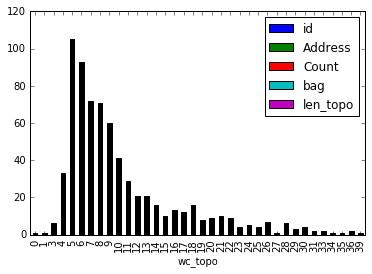

In [7]:
wc_topodf = df.groupby('wc_topo').count()
print(wc_topodf[wc_topodf.Count != 1])
wc_topodf.plot(kind='bar')
plt.show()

In [8]:
df.drop('bag',1,inplace=True)
kmeans_model = KMeans(n_clusters=6, random_state=1).fit(df.iloc[:,:4])
labels =kmeals_model.labels_
# df.iloc[:,:4]

ValueError: could not convert string to float: '11-11-11-11-11-11-11-11-11-11-11-11-11-11-11-11-2-6-5-4'